In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Presentation Prep

In [3]:
data = pd.read_csv("../data/fish-and-seafood-consumption-per-capita.csv")

In [4]:
data_grouped = data.groupby(["Year"]).mean()

In [6]:
data_grouped.rename(columns={"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)": "Mean global seafood consumption"}, inplace=True)
#data_grouped.dtypes

<Figure size 720x360 with 0 Axes>

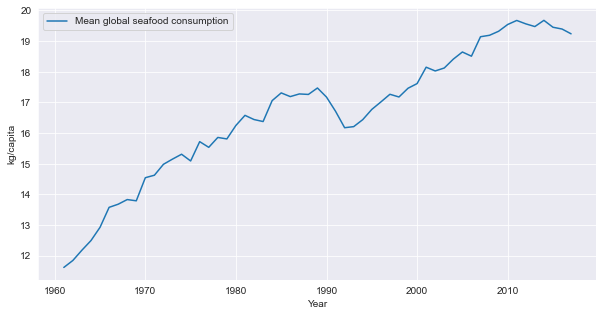

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]

fig = plt.figure( )

data_grouped.plot(kind="line")
plt.xlabel( "Year" )
plt.ylabel( "kg/capita" )
plt.title( "" , fontdict = {'fontsize': 14} )

plt.show()

# Homework 1

[19-4-2022 16:56] Simon Moe Sørensen:

'Niels Jansen' can you look into which countries are the most impactful wrt to overfishing? And perhaps some data on import / export ratios for all countries and plot that too

## Impact of overfishing

[source](https://www.conserve-energy-future.com/causes-effects-solutions-of-overfishing.php)
Some of the causes of overfishing include:
    
    - Difficulties in regulating fishing areas due to lack of resources and tracking activity.
    - Most areas in the world have a total lack of oversight related to their fishing industry, which means the practices and activities of fishing fleets are not or barely monitored.
    - In international waters, there are little to no rules regarding fishing practices, which means fishing fleets can bypass areas that do have regulations.
    - Lack of knowledge regarding fish populations and quotas in a universal standard.
    - Problems with customs and importation where the provenance of fish is not questioned, leading to surreptitious practices such as calling one kind of fish something else.
    - Unreported fishing, which is nearly impossible to track.
    - Many countries have subsidies for fishermen which keeps their number higher than it needs to be (it is estimated that there are 2 ½ times more fleets than needed).
    - Fishing areas are largely unprotected – only a little over 1.5% of oceans have been declared protective areas, and most of these are still open to fishermen. This means that areas can be harmed or depleted.
    
Effects:

    - 1. Removal of Essential Predators
    - 2. Poor Coral Reef Health
    - 3. Growth of Algae
    - 4. Unintended Catches
    - 5. The Threat to Local Food Sources
    - 6. Financial Losses
    - 7. An Utter Imbalance of the Marine Ecosystems
    - 8. The Targeted Fish and its Harvest
    - 9. Rise of the Endangered Species
    - 10. Improper Aquaculture

## Data on Import/Export

In [8]:
fish_Im = pd.read_csv("../data/FAOSTAT_import.csv")
fish_Ex = pd.read_csv("../data/FAOSTAT_export.csv")

fish_Im = fish_Im.drop(["Domain Code", "Domain", "Area Code (FAO)", "Element Code", "Element", "Item Code", "Item", "Year Code", "Unit", "Flag", "Flag Description"], axis=1);
# These are not present in export and not notable countries
fish_Im = fish_Im.loc[ fish_Im["Area"] != "Tajikistan" ];
fish_Im = fish_Im.loc[ fish_Im["Area"] != "Afghanistan" ];

fish_Ex = fish_Ex.drop(["Domain Code", "Domain", "Area Code (FAO)", "Element Code", "Element", "Item Code", "Item", "Year Code", "Unit", "Flag", "Flag Description"], axis=1);

### Let's first look at the import and export stats per country.

In [9]:
# Sort on highest import values
Im_lastyear = fish_Im.loc[ fish_Im["Year"] == 2019 ].sort_values("Value", axis=0, ignore_index=True, ascending=False)
Ex_lastyear = fish_Ex.loc[ fish_Ex["Year"] == 2019 ]

Ex_lastyear = Ex_lastyear.set_index('Area');
Ex_lastyear = Ex_lastyear.reindex(index=Im_lastyear["Area"]);
Ex_lastyear.reset_index();

Im_lastyear = Im_lastyear.set_index('Area');

In [10]:
# ALTERNATIVELY
# Sort on highest export values
Im_lastyear = fish_Im.loc[ fish_Im["Year"] == 2019 ]
Ex_lastyear = fish_Ex.loc[ fish_Ex["Year"] == 2019 ].sort_values("Value", axis=0, ignore_index=True, ascending=False)

Im_lastyear = Im_lastyear.set_index('Area');
Im_lastyear = Im_lastyear.reindex(index=Ex_lastyear["Area"]);
Im_lastyear.reset_index();

Ex_lastyear = Ex_lastyear.set_index('Area');

In [11]:
# show only the top N countries (set 178 for all)
N = 20
plt.rcParams['figure.figsize'] = [5, 5 + (N*70/178)]
y_axis = Im_lastyear[0:N].index
x_axis_Im = Im_lastyear["Value"][0:N]
x_axis_Ex = Ex_lastyear["Value"][0:N]

From the below visualization we can see a few interesting things:

    - China is both the biggest importer and exported. To me this seems weird, why would countries be importing and exporting about the same amount? Are they reselling or is it related to fishing seasons? I think it's most lickely that they export native species and import non-native species.
    - Apart from China and the US countries with a lot of export import a lot less (Peru, Nam, Norway...) what makes these different? Do they eat less fish, so they don't want it or do they have more native species?
    - Japan, France, Korea, Italy export a lot more tehn they omport.
    - It could be interesting to group/look at individual continets idk.

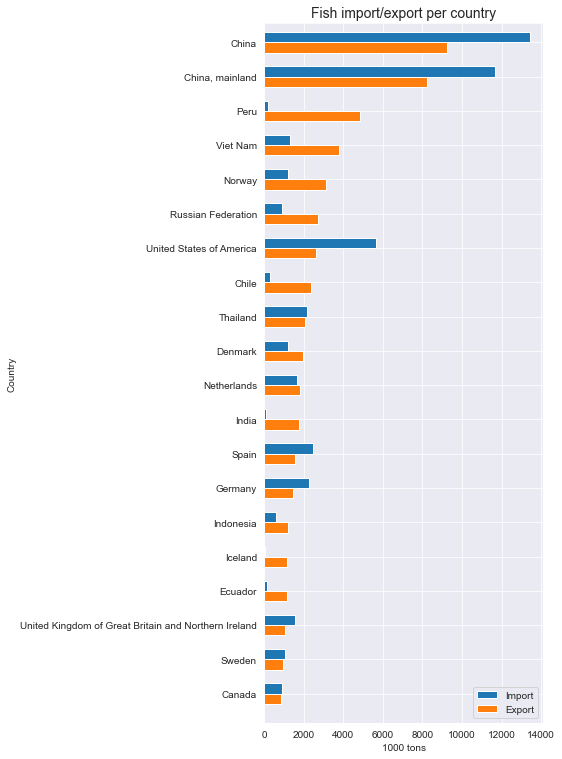

In [12]:
# Visualization
fig, ax = plt.subplots( )

ind = np.arange(N)
width = 0.3

ax.barh(ind, x_axis_Im, width) # IMPORT
ax.barh(ind + width, x_axis_Ex, width) # EXPORT

ax.set(yticks=ind + width/2, yticklabels=y_axis, ylim=[2*width - 1, len(y_axis)])

plt.rcParams["legend.loc"] = 'lower right' 
ax.legend(['Import', 'Export'])

plt.xlabel( "1000 tons" )
plt.ylabel( "Country" )
plt.title( "Fish import/export per country" , fontdict = {'fontsize': 14} )

# to show highest at the top
plt.gca().invert_yaxis()

plt.show()

### Looking at individual countries over time.

In [16]:
# Sort on year
country = "China"
Im_indiv = fish_Im.loc[ fish_Im["Area"] == country ].sort_values("Year", axis=0, ignore_index=True, ascending=True)
Ex_indiv = fish_Ex.loc[ fish_Ex["Area"] == country ].sort_values("Year", axis=0, ignore_index=True, ascending=True)

Ex_indiv = Ex_indiv.set_index('Year');
Im_indiv = Im_indiv.set_index('Year');

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
y_axis = Im_indiv.index
x_axis_Im = Im_indiv["Value"]
x_axis_Ex = Ex_indiv["Value"]

In the visualization we can see that the import of fish in China has drasticly increased over the last years. Likely due to efforts to maintain the natural enviroment ([haven't read it completely]([https://www.seafoodsource.com/features/why-the-long-term-outlook-for-china-s-seafood-imports-is-bright#:~:text=The%20ruination%20of%20China's%20own,like%20crabs%2C%20lobster%20and%20salmon.])). Most other countries I've tried to inspect manually have not changed much over the years, but lets see if we can find some interesting cases automatically.

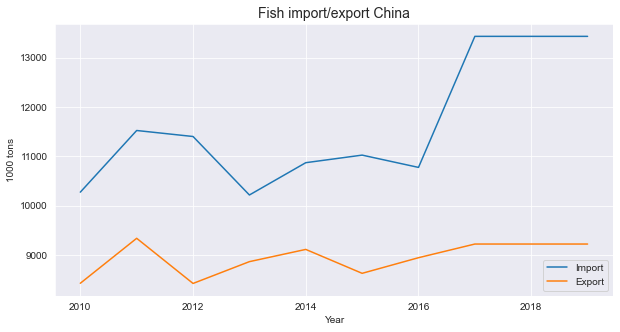

In [18]:
# Visualization
fig, ax = plt.subplots()

ax.plot(y_axis, x_axis_Im) # IMPORT
ax.plot(y_axis, x_axis_Ex) # EXPORT

plt.rcParams["legend.loc"] = 'lower right' 
ax.legend(['Import', 'Export'])

plt.xlabel( "Year" )
plt.ylabel( "1000 tons" )
plt.title( "Fish import/export " + country, fontdict = {'fontsize': 14} )

plt.show()

### Finding interesting countries.

I'll just be looking for countries with the biggest relative change in their import/export over the given time period.

In [365]:
# Sort on highest import values
# FIRST YEAR
Im_first = fish_Im.loc[ fish_Im["Year"] == 2010 ].sort_values("Value", axis=0, ignore_index=True, ascending=False)
Ex_first = fish_Ex.loc[ fish_Ex["Year"] == 2010 ]

Ex_first = Ex_first.set_index('Area');
Ex_first = Ex_first.reindex(index=Im_first["Area"]);
Ex_first.reset_index();

Im_first = Im_first.set_index('Area');

# LAST YEAR (yes we're sort of redoing this, sue me)
Im_last = fish_Im.loc[ fish_Im["Year"] == 2019 ].sort_values("Value", axis=0, ignore_index=True, ascending=False)
Ex_last = fish_Ex.loc[ fish_Ex["Year"] == 2019 ]

Ex_last = Ex_last.set_index('Area');
Ex_last = Ex_last.reindex(index=Im_last["Area"]);
Ex_last.reset_index();

Im_last = Im_last.set_index('Area');

In [372]:
# These indexes do not occur in both start and finish so we drop them
print( Im_last.index.difference(Im_first.index) )
print( Im_first.index.difference(Im_last.index) )

print( Ex_last.index.difference(Ex_first.index) )
print( Ex_first.index.difference(Ex_last.index) )

Index([], dtype='object', name='Area')
Index([], dtype='object', name='Area')
Index([], dtype='object', name='Area')
Index([], dtype='object', name='Area')


In [371]:
Im_last = Im_last.loc[ Im_last.index != "Burundi" ];
Im_last = Im_last.loc[ Im_last.index != "Sudan" ];
Ex_last = Ex_last.loc[ Ex_last.index != "Burundi" ];
Ex_last = Ex_last.loc[ Ex_last.index != "Sudan" ];

Im_first = Im_first.loc[ Im_first.index != "Netherlands Antilles (former)" ];
Ex_first = Ex_first.loc[ Ex_first.index != "Netherlands Antilles (former)" ];

In [407]:
change_Im = (Im_last["Value"]-Im_first["Value"])/Im_first["Value"]
change_Ex = (Ex_last["Value"]-Ex_first["Value"])/Ex_first["Value"]
increases = pd.DataFrame( {"import change":change_Im, "export change":change_Ex} )

In [425]:
# set ascending False to see biggest increases and True to see biggest decreases
# afterwards go back to previous section to inspect further
increases.sort_values("import change", axis=0, ascending=True).head(10)

,import change,export change
Area,,
Venezuela (Bolivarian Republic of),-0.794188,1.099181
Nigeria,-0.695738,-0.771274
Solomon Islands,-0.674121,1.429663
Syrian Arab Republic,-0.624636,-0.333333
Gambia,-0.588832,-0.538462
Turkmenistan,-0.575824,NaN
Kyrgyzstan,-0.479037,8.150000
Chad,-0.435294,0.375000
Russian Federation,-0.411544,0.348109


In [457]:
# set ascending False to see biggest increases and True to see biggest decreases
# afterwards go back to previous section to inspect further
increases.sort_values("export change", axis=0, ascending=False).head(10)

,import change,export change
Area,,
Central African Republic,0.275478,inf
Lao People's Democratic Republic,0.782609,inf
Dominica,0.123288,inf
Nepal,1.357784,inf
Kyrgyzstan,-0.479037,8.150000
Libya,-0.159360,5.957746
Rwanda,3.396994,5.545455
Botswana,-0.128571,3.857143
Mauritania,0.693966,3.537519


From the data above we can find interesting countries, however it still takes a little work. 
Unfortunately since we are using percentages these can be very misleading, which needs more work. For insteance Kyrgyzstan has increades export 8 times, however since it export very very little to begin with this doesn't actually mean much.

Countries such as Zambia and Malta have increases a lot in import and Venezuela has decreased a lot. 
Ukraine is the first interesting case for export decrease.

## Data on production

Last years production numbers shows not only by countries, but also per income levels, regions and projects (IDA & IBRD).

<AxesSubplot:xlabel='Year'>

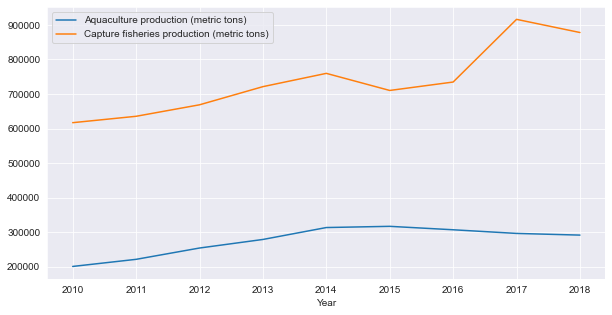

In [25]:
fish_prod = pd.read_csv('../data/capture-fisheries-vs-aquaculture.csv')
fish_prod = fish_prod.set_index('Year')
fish_prod.query('Entity == "Nigeria" and Year >= 2010').plot()


In [80]:
fish_prod_lastyear = fish_prod.loc[ fish_prod["Year"] == 2018 ]
fish_prod_lastyear = fish_prod_lastyear.sort_values("Capture fisheries production (metric tons)", axis=0, ascending=False)
fish_prod_lastyear

,Entity,Code,Year,Capture fisheries production (metric tons)
5971,IDA & IBRD total,NaN,2018,7.490545e+07
7855,Low & middle income,NaN,2018,7.192948e+07
8966,Middle income,NaN,2018,6.909678e+07
5912,IBRD only,NaN,2018,6.191940e+07
3531,East Asia & Pacific,NaN,2018,4.069175e+07
...,...,...,...,...
5027,Gibraltar,GIB,2018,1.000000e+00
402,Andorra,AND,2018,0.000000e+00
11561,San Marino,SMR,2018,0.000000e+00
8022,Luxembourg,LUX,2018,0.000000e+00


 Let's split them up next. Which can be done by checking for a country code. I though we might need `pip install pycountry`, but we don't.

In [81]:
list(pycountry.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533')

In [82]:
fish_prod_lastyear_country = fish_prod_lastyear.loc[ fish_prod_lastyear["Code"].notnull() ]
fish_prod_lastyear_other = fish_prod_lastyear.loc[ fish_prod_lastyear["Code"].isnull() ]

In [83]:
fish_prod_lastyear_country

,Entity,Code,Year,Capture fisheries production (metric tons)
2644,China,CHN,2018,14831310.0
6325,Indonesia,IDN,2018,7270238.0
10702,Peru,PER,2018,7208409.5
13897,United States,USA,2018,5353303.0
6266,India,IND,2018,5342888.0
...,...,...,...,...
5027,Gibraltar,GIB,2018,1.0
402,Andorra,AND,2018,0.0
11561,San Marino,SMR,2018,0.0
8022,Luxembourg,LUX,2018,0.0


In [84]:
fish_prod_lastyear_other

,Entity,Code,Year,Capture fisheries production (metric tons)
5971,IDA & IBRD total,NaN,2018,7.490545e+07
7855,Low & middle income,NaN,2018,7.192948e+07
8966,Middle income,NaN,2018,6.909678e+07
5912,IBRD only,NaN,2018,6.191940e+07
3531,East Asia & Pacific,NaN,2018,4.069175e+07
14015,Upper middle income,NaN,2018,3.690120e+07
3472,Early-demographic dividend,NaN,2018,3.570830e+07
7213,Late-demographic dividend,NaN,2018,3.527528e+07
3649,East Asia & Pacific (excluding high income),NaN,2018,3.452770e+07
3590,East Asia & Pacific (IDA & IBRD),NaN,2018,3.431727e+07


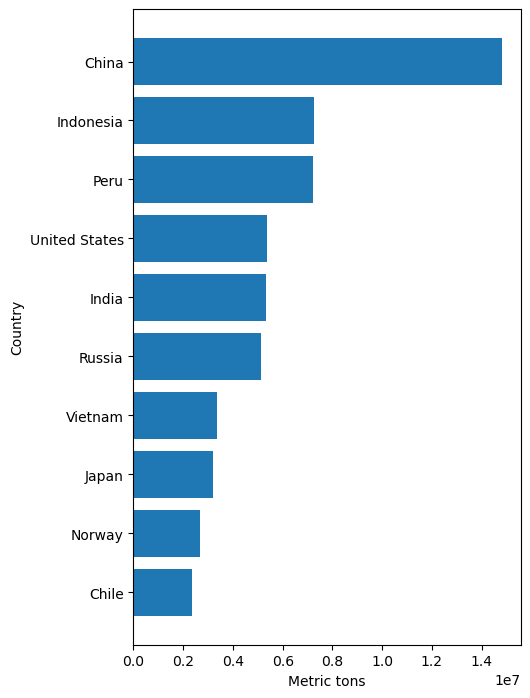

In [89]:
# show only the top N countries (set 215 for all)
N = 10

plt.rcParams['figure.figsize'] = [5, 5 + (N*70/215)]

fig = plt.figure( )

y_axis = fish_prod_lastyear_country["Entity"][0:N]
x_axis = fish_prod_lastyear_country["Capture fisheries production (metric tons)"][0:N]
plt.barh(y_axis, x_axis, height=0.8)


plt.xlabel( "Metric tons" )
plt.ylabel( "Country" )
plt.title( "" , fontdict = {'fontsize': 14} )

# to show highest at the top
plt.gca().invert_yaxis()

plt.show()

Yufan was already working on this so nevermind. Although she should filter out the regions by sorting on "Code" and maybe look at the projects included in the figures.